**1.Dataset Importing**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('/content/predictive_lead_data.csv')

In [3]:
data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


**2.Data Understanding**

In [4]:
data.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [5]:
data.shape

(9240, 37)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [7]:
data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [8]:
#renaming the columns(the existing column names are too lengthy to handle)
data = data.rename(columns={'Lead Origin':'Origin','Lead Source':'Source','Total Time Spent on Website':'Time Spend on Site',
                            'Page Views Per Visit':'Page Viewed','Last Activity':'LA','How did you hear about X Education':'Hear about',
                            'What is your current occupation':'Job','What matters most to you in choosing a course':'Purpose',
                            'Digital Advertisement':'Digital Ad','Through Recommendations':'Recommendations',
                            'Receive More Updates About Our Courses':'Subscribe',
                            'Update me on Supply Chain Content':'Supply Chain','Get updates on DM Content':'DM',
                            'Asymmetrique Activity Index':'Activity Index',
                            'Asymmetrique Profile Index':'Profile Index','Asymmetrique Activity Score':'Activity Score',
                            'Asymmetrique Profile Score':'Profile Score','I agree to pay the amount through cheque':'Pay by Cheque',
                            'A free copy of Mastering The Interview':'Free copy','X Education Forums': 'Forum_ad'})

In [9]:
data.columns

Index(['Prospect ID', 'Lead Number', 'Origin', 'Source', 'Do Not Email',
       'Do Not Call', 'Converted', 'TotalVisits', 'Time Spend on Site',
       'Page Viewed', 'LA', 'Country', 'Specialization', 'Hear about', 'Job',
       'Purpose', 'Search', 'Magazine', 'Newspaper Article', 'Forum_ad',
       'Newspaper', 'Digital Ad', 'Recommendations', 'Subscribe', 'Tags',
       'Lead Quality', 'Supply Chain', 'DM', 'Lead Profile', 'City',
       'Activity Index', 'Profile Index', 'Activity Score', 'Profile Score',
       'Pay by Cheque', 'Free copy', 'Last Notable Activity'],
      dtype='object')


**3.Data Cleaning**

To treat values like 'Select' as missing (null) and handle them accordingly, you can convert these values to NaN and then proceed with the usual imputation or dropping process.

In [10]:
# Replace 'Select' and other placeholder values with NaN
data.replace('Select', np.nan, inplace=True)

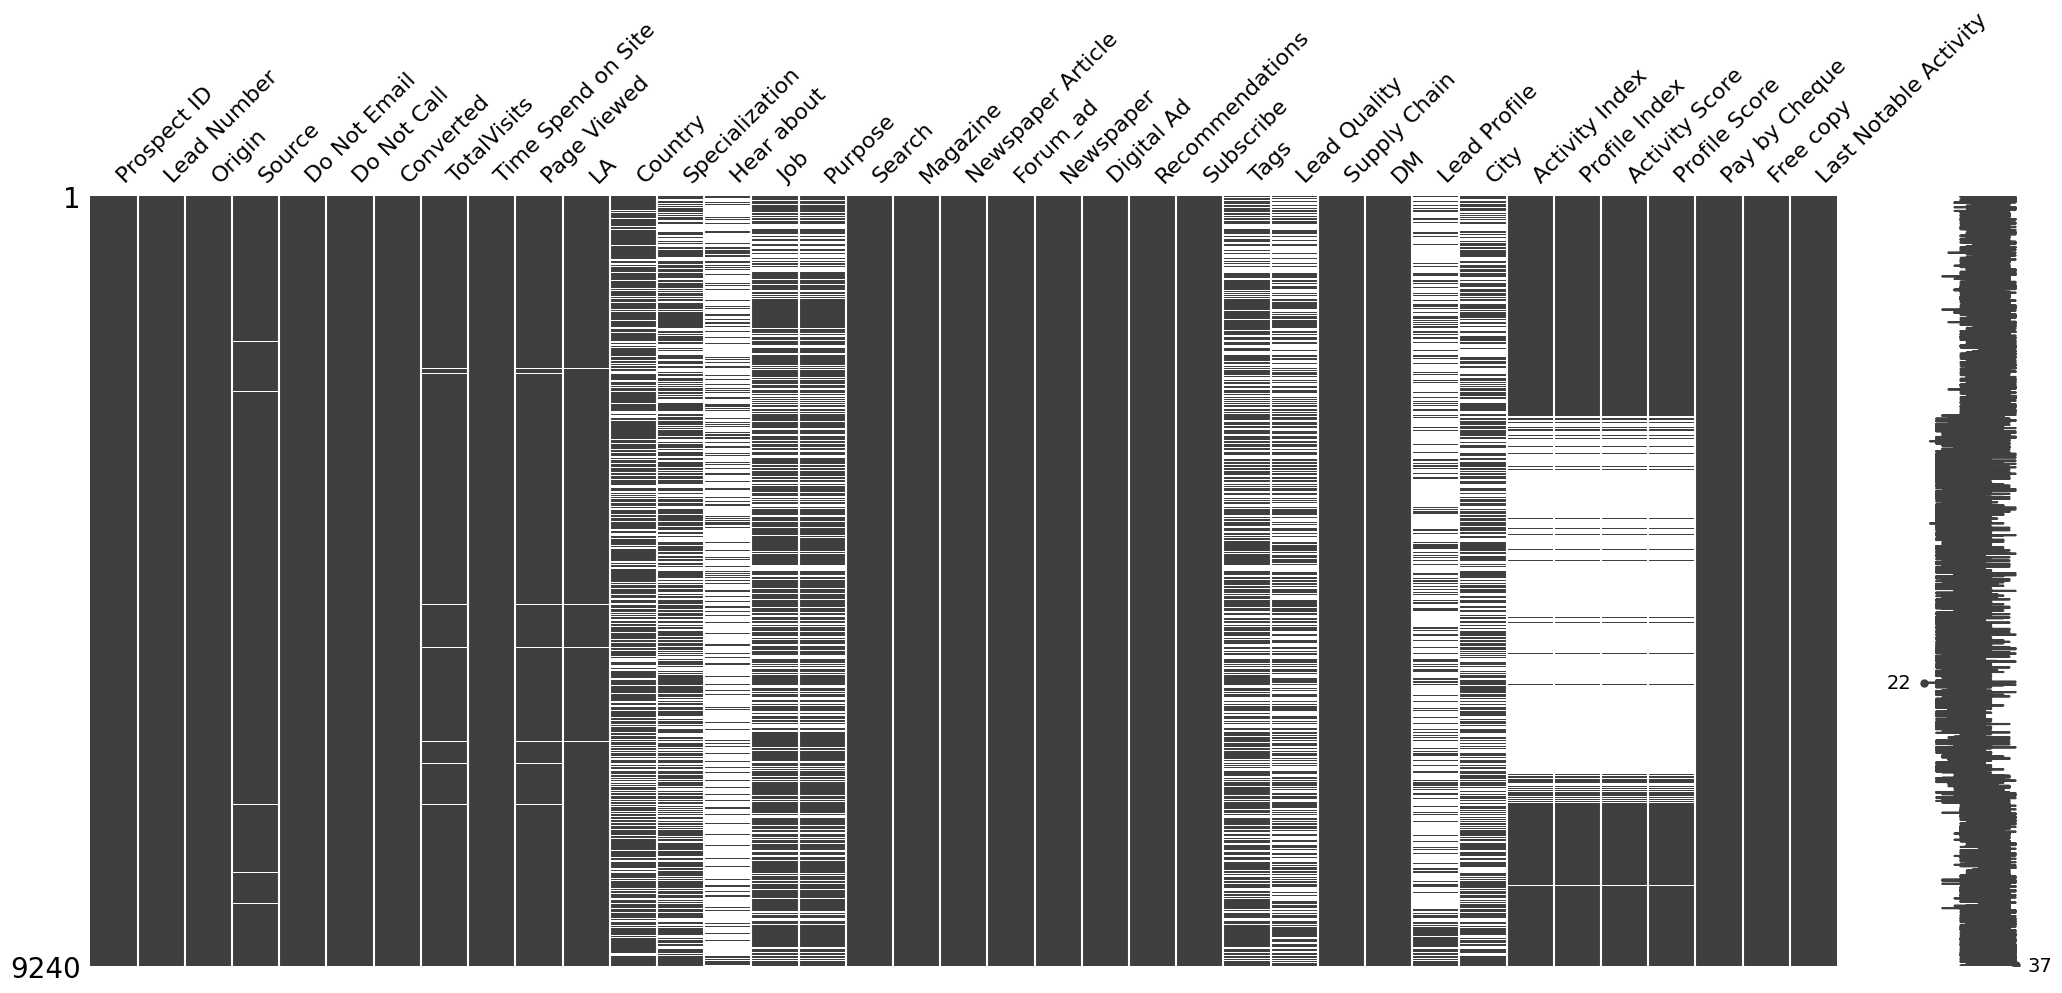

<Figure size 1500x900 with 0 Axes>

In [11]:
#missing values visualization
import missingno as msno
msno.matrix(data)
plt.figure(figsize=(15,9))
plt.show()

In [12]:
def get_numerical_summary(data):
  total=data.shape[0]
  missing_cols=[col  for col in data.columns if data[col].isnull().sum()>0]
  missing_percentage={}

  for col in missing_cols:
    null_count=data[col].isnull().sum()
    per=(null_count/total)*100
    missing_percentage[col]=per
    print(f'{col}:{null_count},({round(per,3)})')
  return missing_percentage

In [13]:
miss_per =get_numerical_summary(data)

Source:36,(0.39)
TotalVisits:137,(1.483)
Page Viewed:137,(1.483)
LA:103,(1.115)
Country:2461,(26.634)
Specialization:3380,(36.58)
Hear about:7250,(78.463)
Job:2690,(29.113)
Purpose:2709,(29.318)
Tags:3353,(36.288)
Lead Quality:4767,(51.591)
Lead Profile:6855,(74.188)
City:3669,(39.708)
Activity Index:4218,(45.649)
Profile Index:4218,(45.649)
Activity Score:4218,(45.649)
Profile Score:4218,(45.649)


A.Handling missing values (Dropping)

In [14]:
#dropping the columns 'Prospect ID' and 'Lead Number' as there are unique values and are of irrelevant
data.drop(['Prospect ID', 'Lead Number'],inplace=True,axis=1)

In [15]:
#verifying
data.columns

Index(['Origin', 'Source', 'Do Not Email', 'Do Not Call', 'Converted',
       'TotalVisits', 'Time Spend on Site', 'Page Viewed', 'LA', 'Country',
       'Specialization', 'Hear about', 'Job', 'Purpose', 'Search', 'Magazine',
       'Newspaper Article', 'Forum_ad', 'Newspaper', 'Digital Ad',
       'Recommendations', 'Subscribe', 'Tags', 'Lead Quality', 'Supply Chain',
       'DM', 'Lead Profile', 'City', 'Activity Index', 'Profile Index',
       'Activity Score', 'Profile Score', 'Pay by Cheque', 'Free copy',
       'Last Notable Activity'],
      dtype='object')

In [16]:
#setting threshold of >30% missing values
# Identifying columns with more than 30% missing data for removal
col_to_drop = (data.isnull().mean() * 100).round(2)[(data.isnull().mean() * 100).round(2) > 30].index
#Removing columns with over 30% missing data
data.drop(columns=col_to_drop, inplace=True)


In [17]:
#verify
data.columns

Index(['Origin', 'Source', 'Do Not Email', 'Do Not Call', 'Converted',
       'TotalVisits', 'Time Spend on Site', 'Page Viewed', 'LA', 'Country',
       'Job', 'Purpose', 'Search', 'Magazine', 'Newspaper Article', 'Forum_ad',
       'Newspaper', 'Digital Ad', 'Recommendations', 'Subscribe',
       'Supply Chain', 'DM', 'Pay by Cheque', 'Free copy',
       'Last Notable Activity'],
      dtype='object')

B.Handling missing values (Imputing method)

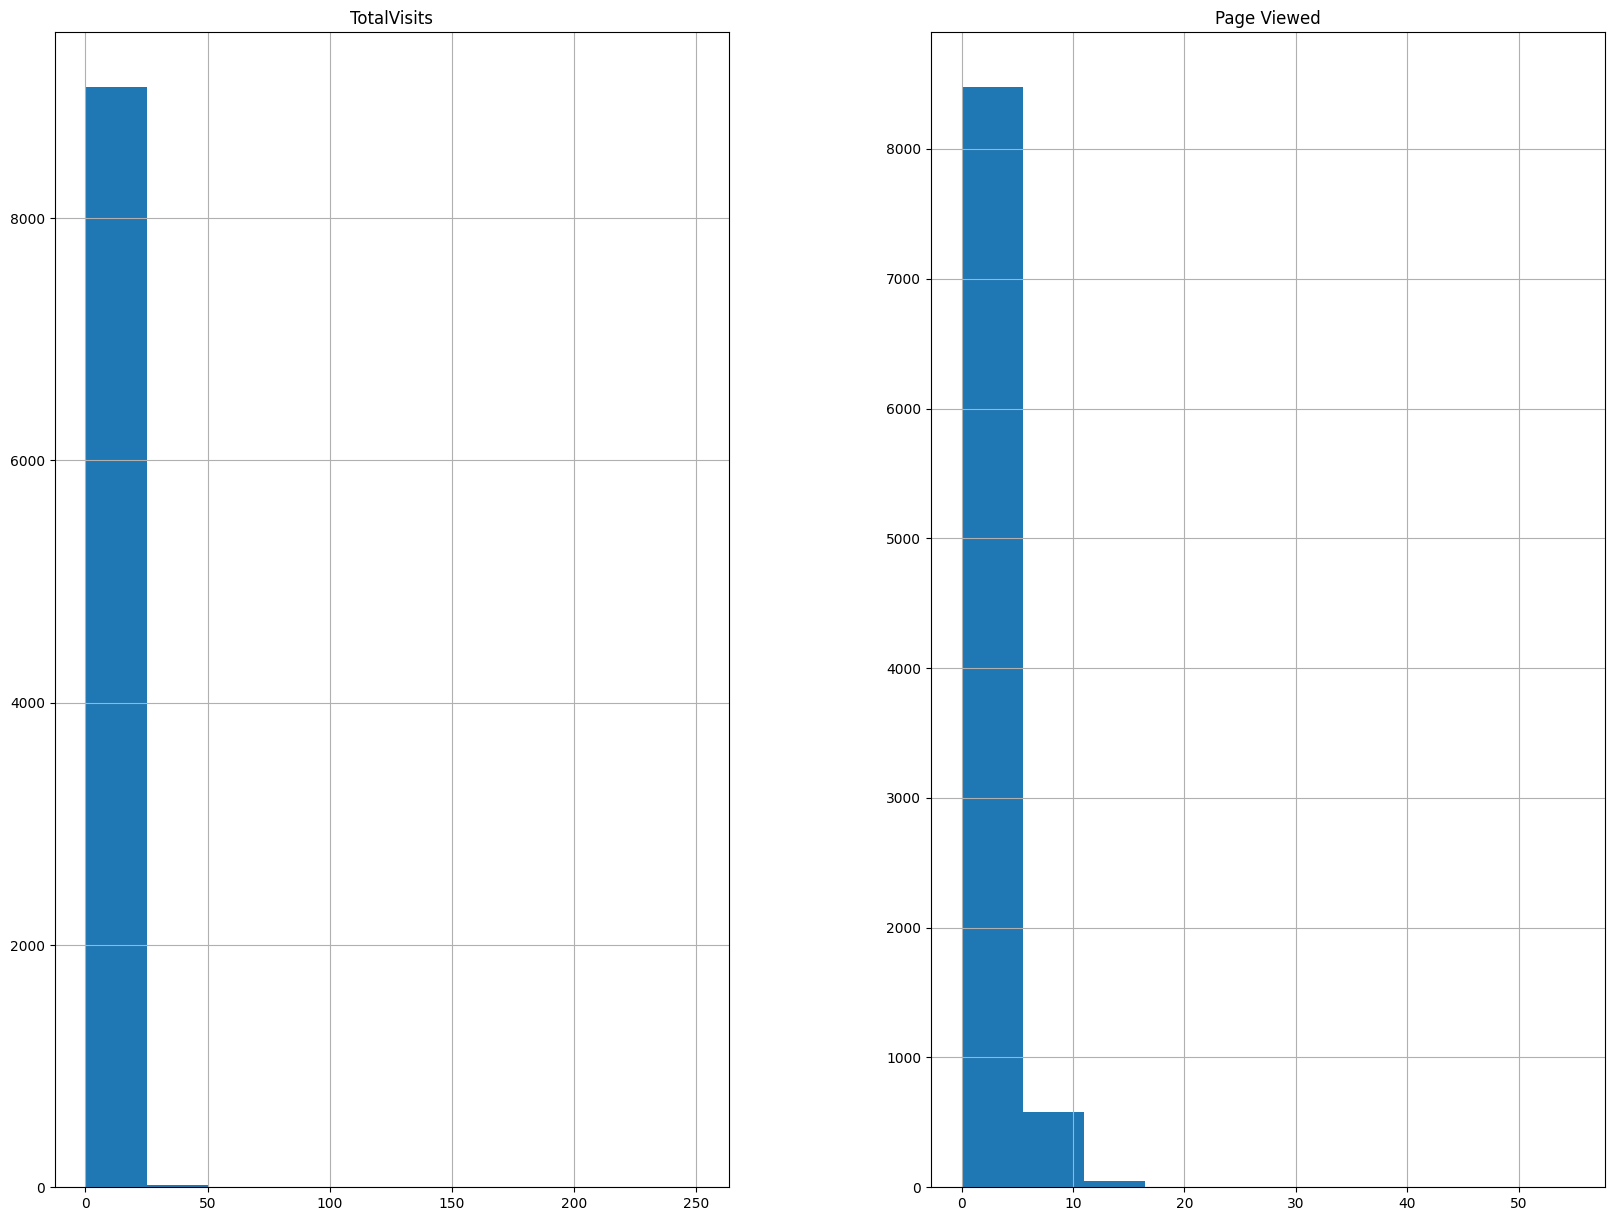

In [18]:
#imputing numerical columns('TotalVisits' , 'Pages Viewed')
freqgraph=data.select_dtypes(include=['float'])
freqgraph.hist(figsize=(20,15))
plt.show()

In [19]:
for col in ['TotalVisits','Page Viewed']:
       data[col]=data[col].fillna(data[col].median())

In [20]:
#Imputing categorical columns
#considering the columns 'Last Activity' and 'Lead Source'
for col in ['LA', 'Source']:
       data[col]=data[col].fillna(data[col].mode()[0])

In [21]:
#verify the missing values
data.isna().sum()

,0
Origin,0
Source,0
Do Not Email,0
Do Not Call,0
Converted,0
TotalVisits,0
Time Spend on Site,0
Page Viewed,0
LA,0
Country,2461


In [22]:
#considering the column 'Job'
data['Job'].value_counts()

,count
Job,
Unemployed,5600
Working Professional,706
Student,210
Other,16
Housewife,10
Businessman,8


In [23]:
# Calculate the percentage of missing data in the 'Job' column
print('Job missing values %   : ', round(data.Job.isnull().sum()/data.shape[0]*100 , 2), '% \n')

#Display the distribution of different occupations as a percentage of the total data
round(data.Job.value_counts()/data.shape[0]*100 , 2)

Job missing values %   :  29.11 % 



,count
Job,
Unemployed,60.61
Working Professional,7.64
Student,2.27
Other,0.17
Housewife,0.11
Businessman,0.09


In [24]:
# Fill in missing values in the 'Job' column with 'Unemployed'
data['Job'].fillna('Unemployed', inplace=True)

In [25]:
#considering the column 'Purpose'
data['Purpose']=data['Purpose'].fillna(data['Purpose'].mode()[0])

In [26]:
#considering the column 'Country
round(data.Country.value_counts()/data.shape[0]*100 , 2).head()

,count
Country,
India,70.26
United States,0.75
United Arab Emirates,0.57
Singapore,0.26
Saudi Arabia,0.23


In [27]:
data['Country']=data['Country'].fillna(data['Country'].mode()[0])

In [28]:
data.isna().sum()

,0
Origin,0
Source,0
Do Not Email,0
Do Not Call,0
Converted,0
TotalVisits,0
Time Spend on Site,0
Page Viewed,0
LA,0
Country,0


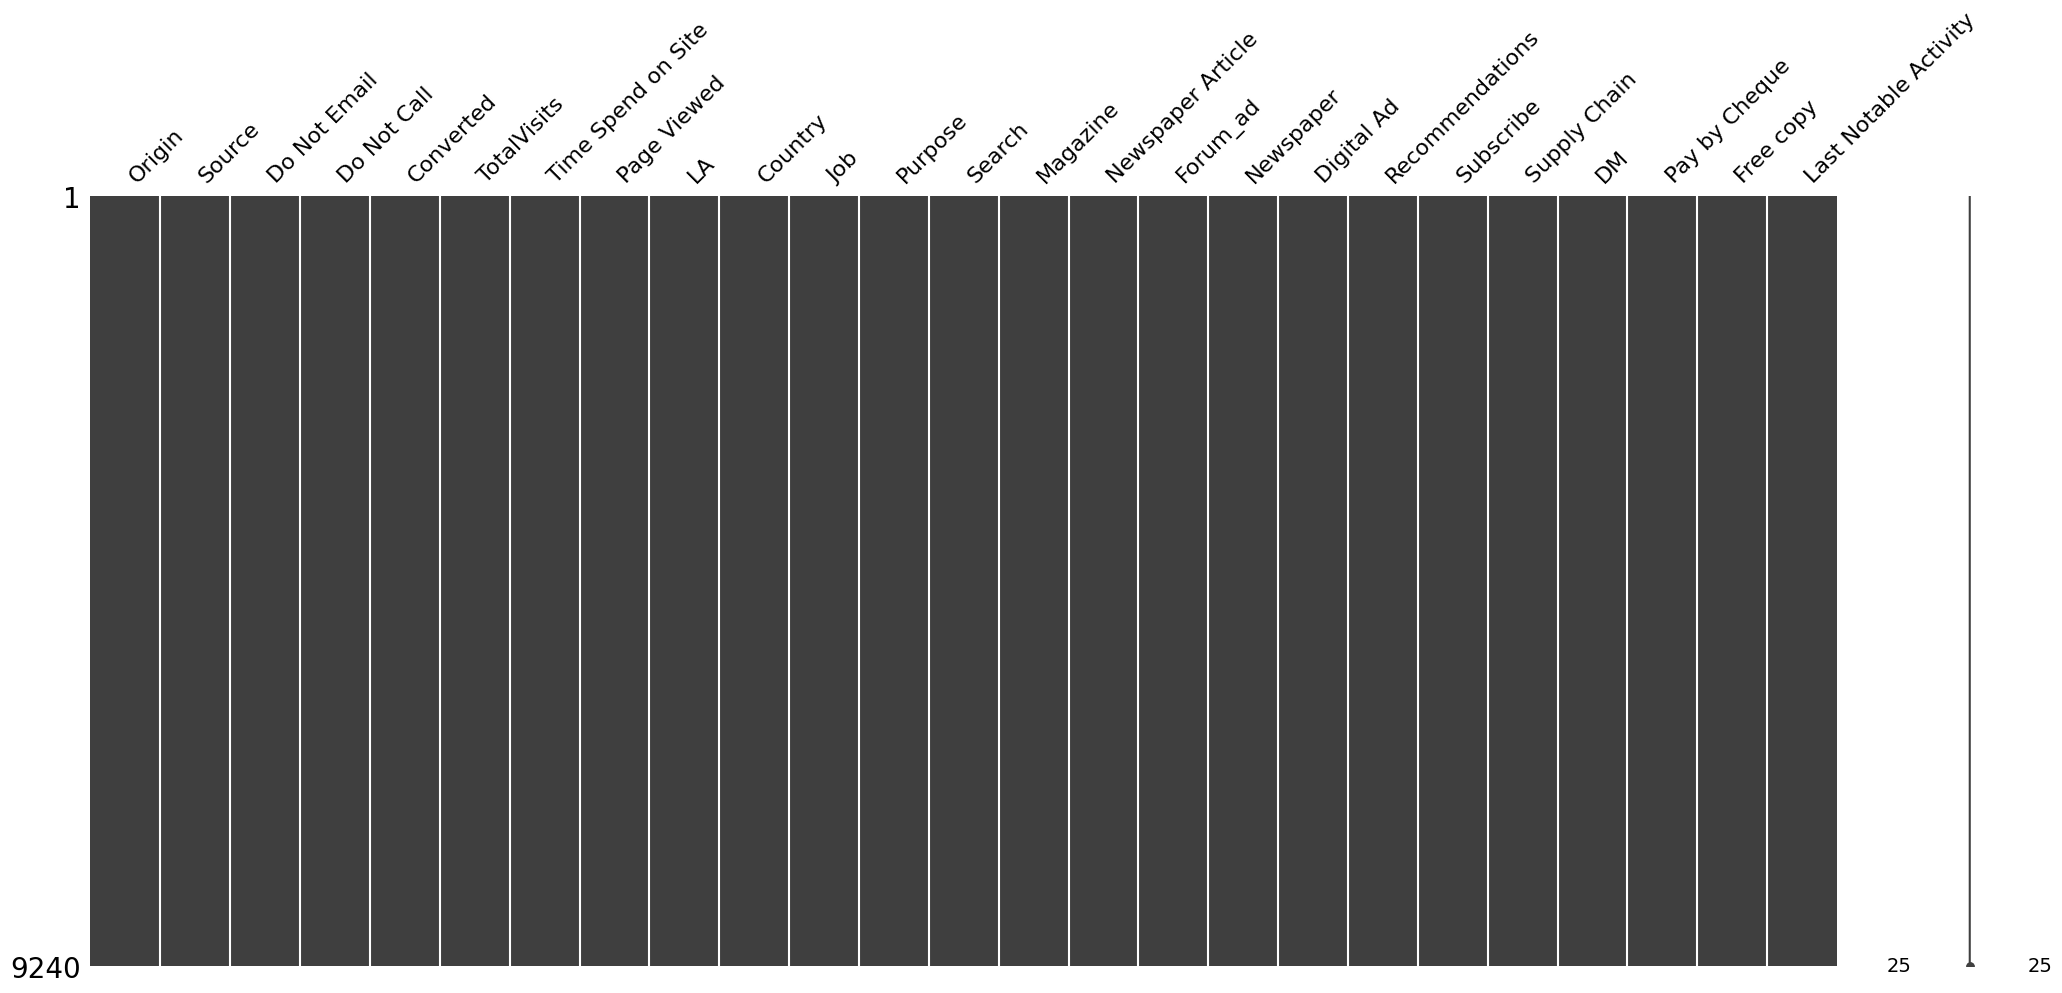

<Figure size 1500x900 with 0 Axes>

In [29]:
#verify
import missingno as msno
msno.matrix(data)
plt.figure(figsize=(15,9))
plt.show()

C.Duplicate Handling

In [30]:
#Dealing with the coumn 'Source' as there are many duplicates
#mapping dictionary
mapping_dict = {
    'google': 'Search Source',
    'Google': 'Search Source',
    'bing': 'Search Source',
    'Organic Search': 'Search Source',
    'Olark Chat': 'Online Chat',
    'Reference': 'Referral Sites',
    'Facebook': 'Social Media',
    'youtubechannel': 'Social Media',
    'welearnblog_Home': 'Welingak Website',
    'WeLearn': 'Welingak Website',
    'blog': 'Others',
    'Pay per Click Ads': 'Others',
    'Click2call': 'Others',
    'Press_Release': 'Others',
    'NC_EDM': 'Others',
    'testone': 'Others',
    'Live Chat': 'Online Chat'
}
# Apply the mapping
data['Source'] = data['Source'].map(mapping_dict).fillna(data['Source'])

In [31]:
data['Source'].value_counts()

,count
Source,
Search Source,4069
Direct Traffic,2543
Online Chat,1757
Referral Sites,659
Welingak Website,144
Social Media,58
Others,10


D.Grouping

In [32]:
#considering the column 'LA'

In [33]:
# Group by 'LA' and calculate the size of each category
activity_counts = data.groupby('LA')['LA'].transform('count')

# Replace categories with fewer than 30 occurrences with 'Others'
data['LA'] = data['LA'].where(activity_counts >= 30, 'Others')

In [34]:
#verify
data['LA'].value_counts()

,count
LA,
Email Opened,3540
SMS Sent,2745
Olark Chat Conversation,973
Page Visited on Website,640
Converted to Lead,428
Email Bounced,326
Email Link Clicked,267
Form Submitted on Website,116
Unreachable,93


In [35]:
#considering the column 'Country'

The countries listed can be grouped based on several possible similarities.Here the countries are being grouped based on the different regions.

In [36]:
#Grouping Asian Regions
data.loc[data['Country'].isin(['India', 'Singapore', 'Hong Kong', 'Philippines', 'Asia/Pacific Region', 'Bangladesh',
                           'China', 'Sri Lanka', 'Malaysia', 'Vietnam', 'Indonesia']), 'Country'] = 'Asia'
#Grouping North American Regions
data.loc[data['Country'].isin(['United States', 'Canada']), 'Country'] = 'America'

#Grouping Middle East Regions
data.loc[data['Country'].isin(['United Arab Emirates', 'Saudi Arabia', 'Qatar', 'Bahrain', 'Oman', 'Kuwait']), 'Country'] = 'Middle_East'

#Grouping European Regions
data.loc[data['Country'].isin(['United Kingdom', 'France', 'Germany', 'Sweden', 'Italy', 'Netherlands', 'Belgium',
                            'Switzerland', 'Denmark', 'Russia']), 'Country'] = 'Europe'
#Grouping Australian Regions
data.loc[data['Country'] == 'Australia', 'Country'] = 'Australia'

#Grouping African Regions
data.loc[data['Country'].isin(['South Africa', 'Nigeria', 'Uganda', 'Ghana', 'Kenya', 'Tanzania', 'Liberia']), 'Country'] = 'Africa'

In [37]:
#renaming 'Country' column to 'Region'
data.rename(columns= {'Country':'Region'}, inplace=True)

In [38]:
#verify and check the renamed column'Region'
data['Region']

,Region
0,Asia
1,Asia
2,Asia
3,Asia
4,Asia
...,...
9235,Middle_East
9236,Asia
9237,Asia
9238,Asia


**4.EDA**

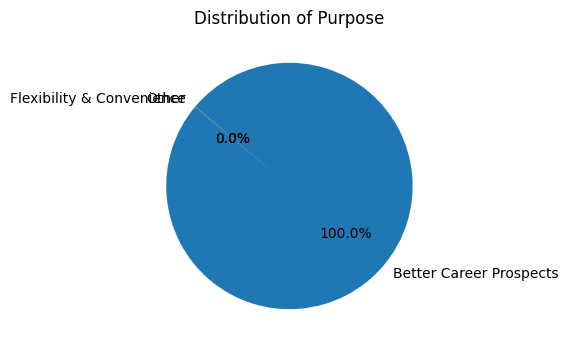

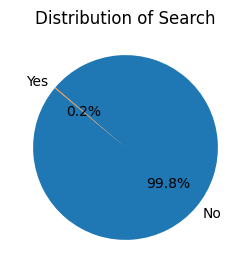

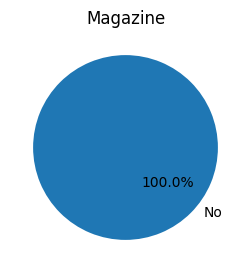

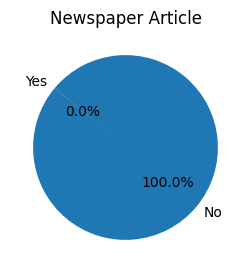

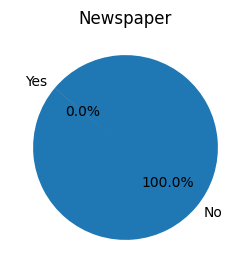

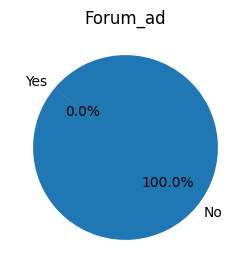

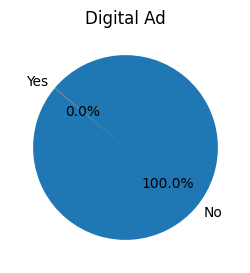

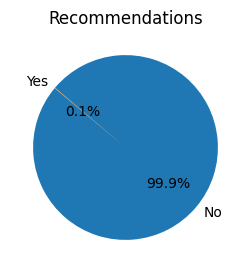

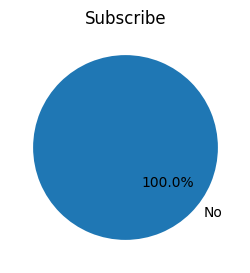

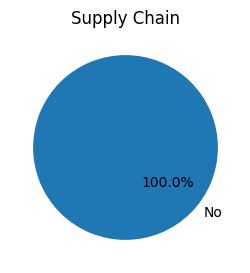

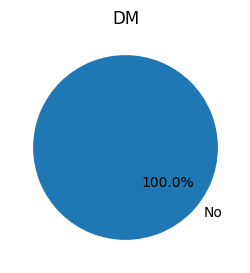

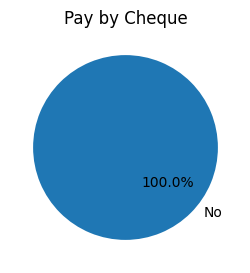

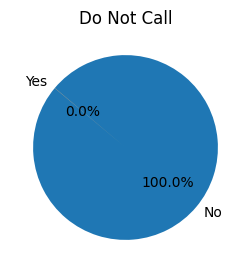

In [39]:
purpose_counts = data['Purpose'].value_counts()
plt.figure(figsize=(4,4))
plt.pie(purpose_counts, labels=purpose_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Purpose')
plt.show()

purpose_counts = data['Search'].value_counts()
plt.figure(figsize=(3,3))
plt.pie(purpose_counts, labels=purpose_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Search')
plt.show()

purpose_counts = data['Magazine'].value_counts()
plt.figure(figsize=(3,3))
plt.pie(purpose_counts, labels=purpose_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Magazine')
plt.show()

purpose_counts = data['Newspaper Article'].value_counts()
plt.figure(figsize=(3,3))
plt.pie(purpose_counts, labels=purpose_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Newspaper Article')
plt.show()

purpose_counts = data['Newspaper'].value_counts()
plt.figure(figsize=(3,3))
plt.pie(purpose_counts, labels=purpose_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Newspaper')
plt.show()

purpose_counts = data['Forum_ad'].value_counts()
plt.figure(figsize=(3,3))
plt.pie(purpose_counts, labels=purpose_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Forum_ad')
plt.show()

purpose_counts = data['Digital Ad'].value_counts()
plt.figure(figsize=(3,3))
plt.pie(purpose_counts, labels=purpose_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Digital Ad')
plt.show()

purpose_counts = data['Recommendations'].value_counts()
plt.figure(figsize=(3,3))
plt.pie(purpose_counts, labels=purpose_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Recommendations')
plt.show()

purpose_counts = data['Subscribe'].value_counts()
plt.figure(figsize=(3,3))
plt.pie(purpose_counts, labels=purpose_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Subscribe')
plt.show()

purpose_counts = data['Supply Chain'].value_counts()
plt.figure(figsize=(3,3))
plt.pie(purpose_counts, labels=purpose_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Supply Chain')
plt.show()

purpose_counts = data['DM'].value_counts()
plt.figure(figsize=(3,3))
plt.pie(purpose_counts, labels=purpose_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('DM')
plt.show()

purpose_counts = data['Pay by Cheque'].value_counts()
plt.figure(figsize=(3,3))
plt.pie(purpose_counts, labels=purpose_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Pay by Cheque')
plt.show()

purpose_counts = data['Do Not Call'].value_counts()
plt.figure(figsize=(3,3))
plt.pie(purpose_counts, labels=purpose_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Do Not Call')
plt.show()

It is clear that the above columns shows minimal variation.It is better to drop the columns with less variability.

In [40]:
# Dropping the features with less/no variations
data.drop(['Magazine', 'Search', 'Newspaper Article', 'Forum_ad', 'Newspaper','Digital Ad','Purpose',
         'Recommendations', 'Subscribe', 'Supply Chain', 'DM' , 'Pay by Cheque','Do Not Call'] , axis = 1 , inplace = True)

In [41]:
data.head()

,Origin,Source,Do Not Email,Converted,TotalVisits,Time Spend on Site,Page Viewed,LA,Region,Job,Free copy,Last Notable Activity
0,API,Online Chat,No,0,0.0,0,0.0,Page Visited on Website,Asia,Unemployed,No,Modified
1,API,Search Source,No,0,5.0,674,2.5,Email Opened,Asia,Unemployed,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Asia,Student,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Asia,Unemployed,No,Modified
4,Landing Page Submission,Search Source,No,1,2.0,1428,1.0,Converted to Lead,Asia,Unemployed,No,Modified


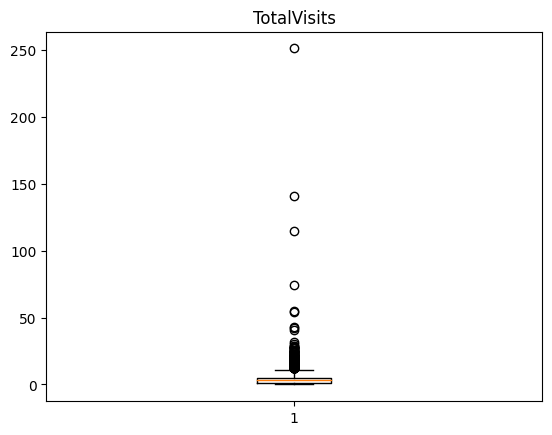

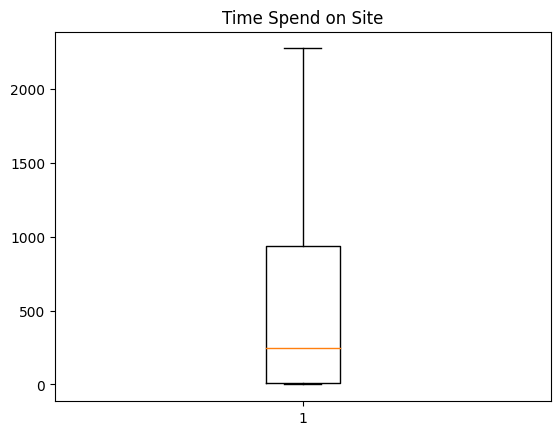

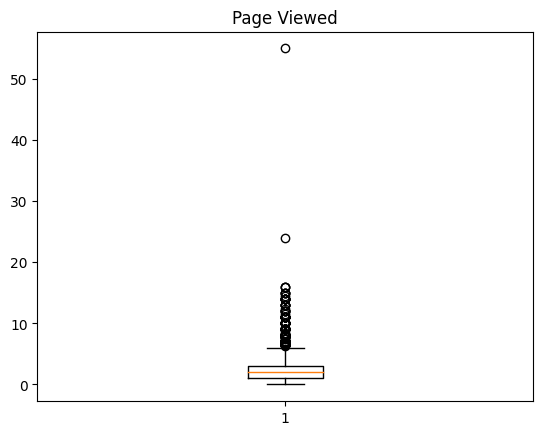

In [42]:
#Outlier handling
for i in ['TotalVisits','Time Spend on Site','Page Viewed']:
  plt.figure()
  plt.boxplot(data[i])
  plt.title(i)


There are outliers in both 'TotalVisits' and 'Page Viewed'

In [43]:
#Handling outliers in Total Visit column using IQR
q1=data['TotalVisits'].quantile(0.25)
q2=data['TotalVisits'].quantile(0.5)
q3=data['TotalVisits'].quantile(0.75)

In [44]:
print(q1,q2,q3)

1.0 3.0 5.0


In [45]:
iqr=q3-q1
LL=q1-(1.5*iqr)
UL=q3+(1.5*iqr)

In [46]:
print(iqr,LL,UL)

4.0 -5.0 11.0


In [47]:
outlier=data[(data['TotalVisits']<LL)|(data['TotalVisits']>UL)].index

In [48]:
data.drop(outlier, inplace=True)

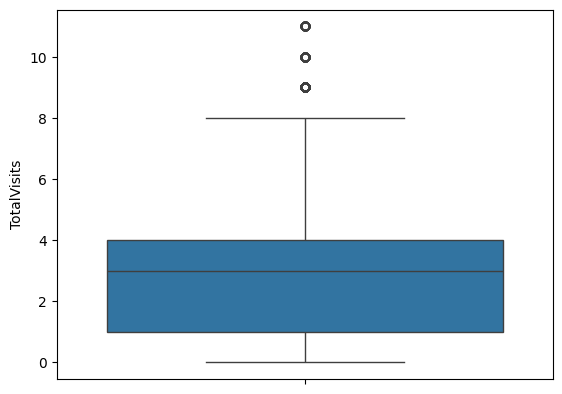

In [49]:
sns.boxplot(y=data['TotalVisits'])
plt.show()

In [50]:
#Handling outliers in Page Viewed column using IQR
q1=data['Page Viewed'].quantile(0.25)
q2=data['Page Viewed'].quantile(0.5)
q3=data['Page Viewed'].quantile(0.75)

In [51]:
iqr=q3-q1
LL=q1-(1.5*iqr)
UL=q3+(1.5*iqr)

In [52]:
outl=data[(data['Page Viewed']<LL)|(data['Page Viewed']>UL)].index

In [53]:
data.drop(outl, inplace=True)

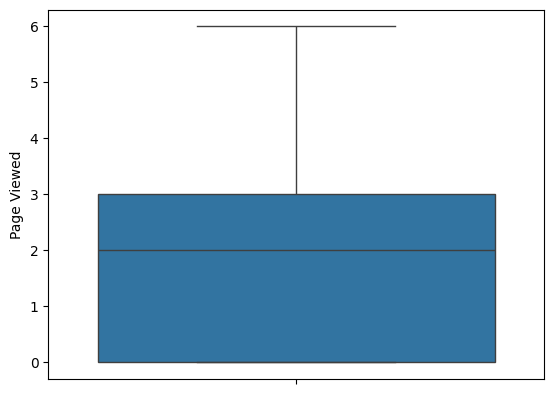

In [54]:
sns.boxplot(y=data['Page Viewed'])
plt.show()

Total Visits and Pages Viewed exhibit correlation of 0.75, which could lead to multicollinearity.

In [55]:
#Correlation check
#encoding variables
LA_coded = data['LA'].astype('category').cat.codes
LNA_coded = data['Last Notable Activity'].astype('category').cat.codes
print('Percentage of correlation between the variables : ', round(LA_coded.corr(LNA_coded)*100 , 2) , '%')

Percentage of correlation between the variables :  75.16 %


*   A correlation of 77.46% between "LA(Last Activity)" and "Last Notable Activity"
suggests a strong positive relationship between these two variables
*   This high correlation means that the two columns contain similar information, which could lead to multicollinearity in your model
*   Since the columns are highly correlated, dropping one could simplify your model without losing much information.
*  This can help reduce multicollinearity, leading to more stable and interpretable model coefficients.




In [56]:
# Dropping 'Last Notable Activity' Column
data.drop('Last Notable Activity' , inplace = True , axis = 1)

In [57]:
data.head()

,Origin,Source,Do Not Email,Converted,TotalVisits,Time Spend on Site,Page Viewed,LA,Region,Job,Free copy
0,API,Online Chat,No,0,0.0,0,0.0,Page Visited on Website,Asia,Unemployed,No
1,API,Search Source,No,0,5.0,674,2.5,Email Opened,Asia,Unemployed,No
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Asia,Student,Yes
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Asia,Unemployed,No
4,Landing Page Submission,Search Source,No,1,2.0,1428,1.0,Converted to Lead,Asia,Unemployed,No


**5.Encoding**

In [58]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Do Not Email']=le.fit_transform(data['Do Not Email'])
data['Free copy']=le.fit_transform(data['Free copy'])

In [59]:
data.head()

,Origin,Source,Do Not Email,Converted,TotalVisits,Time Spend on Site,Page Viewed,LA,Region,Job,Free copy
0,API,Online Chat,0,0,0.0,0,0.0,Page Visited on Website,Asia,Unemployed,0
1,API,Search Source,0,0,5.0,674,2.5,Email Opened,Asia,Unemployed,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Asia,Student,1
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Asia,Unemployed,0
4,Landing Page Submission,Search Source,0,1,2.0,1428,1.0,Converted to Lead,Asia,Unemployed,0


In [60]:
data1=data[['Origin','Source','LA','Region','Job']]

In [61]:
#One hot Encoding
data1 = pd.get_dummies(data1)
data1 = data1.astype(int)
data1.head()

,Origin_API,Origin_Landing Page Submission,Origin_Lead Add Form,Origin_Lead Import,Origin_Quick Add Form,Source_Direct Traffic,Source_Online Chat,Source_Others,Source_Referral Sites,Source_Search Source,...,Region_Australia,Region_Europe,Region_Middle_East,Region_unknown,Job_Businessman,Job_Housewife,Job_Other,Job_Student,Job_Unemployed,Job_Working Professional
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [62]:
data.drop(columns=['Origin','Source','LA','Region','Job'],inplace=True)

In [63]:
data.columns

Index(['Do Not Email', 'Converted', 'TotalVisits', 'Time Spend on Site',
       'Page Viewed', 'Free copy'],
      dtype='object')

In [64]:
data=pd.concat([data,data1],axis=1)

In [65]:
data.columns

Index(['Do Not Email', 'Converted', 'TotalVisits', 'Time Spend on Site',
       'Page Viewed', 'Free copy', 'Origin_API',
       'Origin_Landing Page Submission', 'Origin_Lead Add Form',
       'Origin_Lead Import', 'Origin_Quick Add Form', 'Source_Direct Traffic',
       'Source_Online Chat', 'Source_Others', 'Source_Referral Sites',
       'Source_Search Source', 'Source_Social Media',
       'Source_Welingak Website', 'LA_Converted to Lead', 'LA_Email Bounced',
       'LA_Email Link Clicked', 'LA_Email Opened',
       'LA_Form Submitted on Website', 'LA_Had a Phone Conversation',
       'LA_Olark Chat Conversation', 'LA_Others', 'LA_Page Visited on Website',
       'LA_SMS Sent', 'LA_Unreachable', 'LA_Unsubscribed', 'Region_Africa',
       'Region_America', 'Region_Asia', 'Region_Australia', 'Region_Europe',
       'Region_Middle_East', 'Region_unknown', 'Job_Businessman',
       'Job_Housewife', 'Job_Other', 'Job_Student', 'Job_Unemployed',
       'Job_Working Professional'],
     

In [66]:
#dropping irrelevant columns
data.drop(columns=['Source_Others','LA_Others','Region_unknown','Job_Other'],inplace=True)

In [67]:
data.head()

,Do Not Email,Converted,TotalVisits,Time Spend on Site,Page Viewed,Free copy,Origin_API,Origin_Landing Page Submission,Origin_Lead Add Form,Origin_Lead Import,...,Region_America,Region_Asia,Region_Australia,Region_Europe,Region_Middle_East,Job_Businessman,Job_Housewife,Job_Student,Job_Unemployed,Job_Working Professional
0,0,0,0.0,0,0.0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,5.0,674,2.5,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,0,1,2.0,1532,2.0,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
3,0,0,1.0,305,1.0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,1,2.0,1428,1.0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0


**6.Train Test Split**

In [68]:
#checking the class imbalance
data['Converted'].value_counts(normalize=True)

,proportion
Converted,
0,0.616085
1,0.383915


In [69]:
#Splitting the Features and target variable
X = data.drop('Converted' , axis = 1)
y = data['Converted']

In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Standard Scaling

In [71]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

1.Logistic Regression

In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

Confusion Matrix:
[[1405  190]
 [ 325  684]]

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.88      0.85      1595
           1       0.78      0.68      0.73      1009

    accuracy                           0.80      2604
   macro avg       0.80      0.78      0.79      2604
weighted avg       0.80      0.80      0.80      2604


Accuracy Score: 0.8022273425499232


2.Random Forest Classifier

In [73]:
from sklearn.ensemble import RandomForestClassifier
rf_clf1=RandomForestClassifier(n_estimators=20,max_depth=20,criterion='entropy',min_samples_split=3)
rf_clf1.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=20, min_samples_split=3,
                       n_estimators=20)

In [74]:
y_pred=rf_clf1.predict(X_test)

In [75]:
print('Accuracy is= ',accuracy_score(y_test,y_pred))

Accuracy is=  0.7968509984639017


In [76]:
#hypertuning
rf_clf2=RandomForestClassifier(n_estimators=1000,max_depth=20,criterion='entropy',min_samples_split=3)          #now try with 1000 trees
rf_clf2.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=20, min_samples_split=3,
                       n_estimators=1000)

In [77]:
y_pred=rf_clf2.predict(X_test)

In [78]:
print('Accuracy is= ',accuracy_score(y_test,y_pred))

Accuracy is=  0.8010752688172043


3.Gradient Boosting Classifier

In [79]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbc.fit(X_train, y_train)
y_pred = gbc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))


Accuracy: 0.8184
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1595
           1       0.77      0.75      0.76      1009

    accuracy                           0.82      2604
   macro avg       0.81      0.81      0.81      2604
weighted avg       0.82      0.82      0.82      2604



4.SVM

In [80]:
from sklearn.svm import SVC
svc = SVC(kernel='rbf', C=1.0, gamma='scale', probability=True, random_state=42)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
y_pred_proba = svc.predict_proba(X_test)[:, 1]
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.8049
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.88      0.85      1595
           1       0.78      0.69      0.73      1009

    accuracy                           0.80      2604
   macro avg       0.80      0.78      0.79      2604
weighted avg       0.80      0.80      0.80      2604



Here model gave the accuracy of 0.8184 using the gradient boosting method.Therefore the best method is gradient boosting classifier in comparison to other models used like SVM, logistic regression and random forest classifier